In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

samples = ['The cat sits on the mat', 'The other cat % $ # @ runs over the mats']
tokenizer = Tokenizer(num_words=12)
tokenizer.fit_on_texts(samples)
word_index = tokenizer.word_index
print(word_index)

seq = tokenizer.texts_to_sequences(samples)
print(seq)

xx = sequence.pad_sequences(seq, maxlen=7)
print(xx)

xx1 = tokenizer.sequences_to_matrix(seq, mode='binary')
print(xx1)

{'the': 1, 'cat': 2, 'sits': 3, 'on': 4, 'mat': 5, 'other': 6, 'runs': 7, 'over': 8, 'mats': 9}
[[1, 2, 3, 4, 1, 5], [1, 6, 2, 7, 8, 1, 9]]
[[0 1 2 3 4 1 5]
 [1 6 2 7 8 1 9]]
[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.]]


In [3]:
tokenizer = Tokenizer(num_words=4)
texts = ['a b b c c c', 'a b c c']
tokenizer.fit_on_texts(texts)

matrix1 = tokenizer.texts_to_matrix(texts, mode='binary')
matrix2 = tokenizer.texts_to_matrix(texts, mode='count')
matrix3 = tokenizer.texts_to_matrix(texts, mode='tfidf')

print(matrix1)
print(matrix2)
print(matrix3)

[[0. 1. 1. 1.]
 [0. 1. 1. 1.]]
[[0. 3. 2. 1.]
 [0. 2. 1. 1.]]
[[0.         1.07202493 0.86490296 0.51082562]
 [0.         0.86490296 0.51082562 0.51082562]]


In [4]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

17464789/17464789 [==============================] - 1s 0us/step
(25000,)
(25000,)
(25000,)


In [10]:
print(x_train[1])
print(y_train[1]) # 부정

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
0


In [11]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout

imdb = Sequential()
imdb.add(Embedding(input_dim=10000, output_dim=95, input_length=100))
imdb.add(Dropout(0.5))
imdb.add(Flatten())
imdb.add(Dropout(0.5))
imdb.add(Dense(1, activation='sigmoid'))
imdb.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 95)           950000    
                                                                 
 dropout_4 (Dropout)         (None, 100, 95)           0         
                                                                 
 flatten_2 (Flatten)         (None, 9500)              0         
                                                                 
 dropout_5 (Dropout)         (None, 9500)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9501      
                                                                 
Total params: 959,501
Trainable params: 959,501
Non-trainable params: 0
_________________________________________________________________


In [15]:
imdb.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
results = imdb.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.15)

Epoch 1/10


2024-11-04 22:00:18.050337: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


665/665 [==============================] - 2s 3ms/step - loss: 0.6035 - accuracy: 0.6721 - val_loss: 0.4449 - val_accuracy: 0.8101
Epoch 2/10
665/665 [==============================] - 2s 3ms/step - loss: 0.3654 - accuracy: 0.8429 - val_loss: 0.3570 - val_accuracy: 0.8443
Epoch 3/10
665/665 [==============================] - 2s 3ms/step - loss: 0.2947 - accuracy: 0.8761 - val_loss: 0.3476 - val_accuracy: 0.8488
Epoch 4/10
665/665 [==============================] - 2s 3ms/step - loss: 0.2589 - accuracy: 0.8933 - val_loss: 0.3468 - val_accuracy: 0.8515
Epoch 5/10
665/665 [==============================] - 2s 3ms/step - loss: 0.2314 - accuracy: 0.9064 - val_loss: 0.3457 - val_accuracy: 0.8547
Epoch 6/10
665/665 [==============================] - 2s 3ms/step - loss: 0.2069 - accuracy: 0.9181 - val_loss: 0.3526 - val_accuracy: 0.8493
Epoch 7/10
665/665 [==============================] - 2s 3ms/step - loss: 0.1810 - accuracy: 0.9288 - val_loss: 0.3577 - val_accuracy: 0.8517
Epoch 8/10
665/66

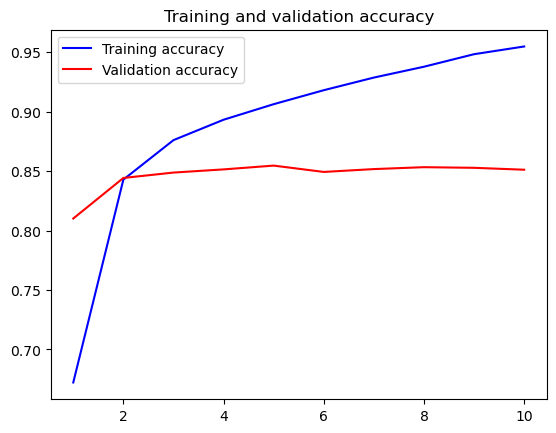

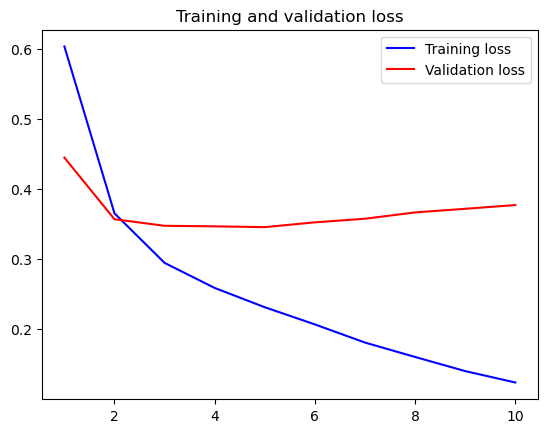

In [17]:
import matplotlib.pyplot as plt

acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 평가를 긍정과 부정으로 나누는 작업

In [19]:
import pandas as pd
import os
import numpy as np

imdb_dir = 'aclImdb'
labels = {'pos': 1, 'neg': 0}
data = []

for data_type in ['train', 'test']:
    for label_type in ['pos', 'neg']:
        path = os.path.join(imdb_dir, data_type, label_type)
        for file in os.listdir(path):
            with open(os.path.join(path, file), 'r', encoding='utf-8') as f:
                txt = f.read()
            data.append([txt, labels[label_type]])

# 데이터 프레임으로 변환
df = pd.DataFrame(data, columns=['review', 'sentiment'])

# 데이터프레임을 무작위로 섞기
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# frac=1로 설정하면 전체 데이터프레임의 100%를 샘플링하여 반환
# reset_index(drop=True)로 섞인 데이터의 인덱스를 0부터 재설정

print(df.head())
print(df.shape)

                                              review  sentiment
0  "Porgy & Bess" was the very first movie my par...          1
1  The 1960's TV series Bewitched owes it's idea ...          1
2  When I first got my N64 when I was five or six...          1
3  I grew up on this movie and I can remember whe...          1
4  this is a dreadful adaption of Charles Kingsle...          0
(50000, 2)


## 읽어올린 텍스트 자료의 토큰화와 인덱스 계열로 만드는 과정

In [20]:
training_samples = 25000
validation_samples = 10000
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'].values)
sequences = tokenizer.texts_to_sequences(df['review'].values)
word_index = tokenizer.word_index
print(len(word_index))

124252


In [21]:
labels = df['sentiment'].values
data = sequence.pad_sequences(sequences, maxlen=max_len)
print(data.shape)
print(labels.shape)

(50000, 100)
(50000,)


In [22]:
x_train = data[:training_samples] # 0 ~ 24,999
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples] # 25,000 ~ 34,999
y_val = labels[training_samples:training_samples + validation_samples]
x_test = data[training_samples + validation_samples:] # 35,000 ~ 50,000
y_test = labels[training_samples + validation_samples:]

In [23]:
# https://nlp.stanford.edu/projects/glove/

glove_dir = 'glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split() # wordembedding을 단어와 인덱스 계열로 분리
    word = values[0]
    seq = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = seq
f.close()

print(len(embeddings_index))

400000


In [24]:
print(word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'be': 26, 'one': 27, 'he': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'so': 34, 'who': 35, 'from': 36, 'like': 37, 'or': 38, 'just': 39, 'her': 40, 'out': 41, 'about': 42, 'if': 43, "it's": 44, 'has': 45, 'there': 46, 'some': 47, 'what': 48, 'good': 49, 'when': 50, 'more': 51, 'very': 52, 'up': 53, 'no': 54, 'time': 55, 'my': 56, 'even': 57, 'would': 58, 'she': 59, 'which': 60, 'only': 61, 'really': 62, 'see': 63, 'story': 64, 'their': 65, 'had': 66, 'can': 67, 'me': 68, 'well': 69, 'were': 70, 'than': 71, 'much': 72, 'we': 73, 'bad': 74, 'been': 75, 'get': 76, 'do': 77, 'great': 78, 'other': 79, 'will': 80, 'also': 81, 'into': 82, 'people': 83, 'because': 84, 'how': 85, 'first': 86, 'him': 87, 'most': 88, "don't":

In [26]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # 단어 하나에 100차원 벡터 지정

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout

model_gl = Sequential()
model_gl.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model_gl.add(Flatten())
model_gl.add(Dropout(0.3))
model_gl.add(Dense(1, activation='sigmoid'))
model_gl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dropout_6 (Dropout)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 1,010,001
Trainable params: 1,010,001
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_gl.layers[0].set_weights([embedding_matrix])
model_gl.layers[0].trainable = False

In [29]:
model_gl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
gl_result = model_gl.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))
model_gl.save_weights('glove_model.h5')

Epoch 1/20
782/782 [==============================] - 1s 1ms/step - loss: 0.7119 - accuracy: 0.6287 - val_loss: 0.9278 - val_accuracy: 0.5869
Epoch 2/20
782/782 [==============================] - 1s 1ms/step - loss: 0.6092 - accuracy: 0.7078 - val_loss: 0.6278 - val_accuracy: 0.6909
Epoch 3/20
782/782 [==============================] - 1s 1ms/step - loss: 0.5865 - accuracy: 0.7251 - val_loss: 0.8388 - val_accuracy: 0.6261
Epoch 4/20
782/782 [==============================] - 1s 1ms/step - loss: 0.5749 - accuracy: 0.7347 - val_loss: 0.5722 - val_accuracy: 0.7267
Epoch 5/20
782/782 [==============================] - 1s 1ms/step - loss: 0.5683 - accuracy: 0.7406 - val_loss: 0.6554 - val_accuracy: 0.6970
Epoch 6/20
782/782 [==============================] - 1s 1ms/step - loss: 0.5704 - accuracy: 0.7441 - val_loss: 0.5986 - val_accuracy: 0.7223
Epoch 7/20
782/782 [==============================] - 1s 1ms/step - loss: 0.5645 - accuracy: 0.7486 - val_loss: 0.6739 - val_accuracy: 0.7049
Epoch 

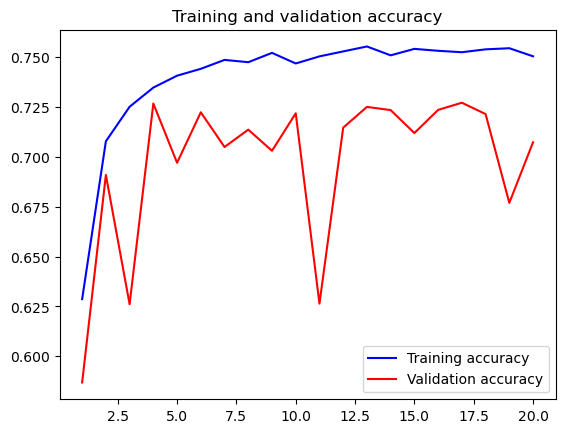

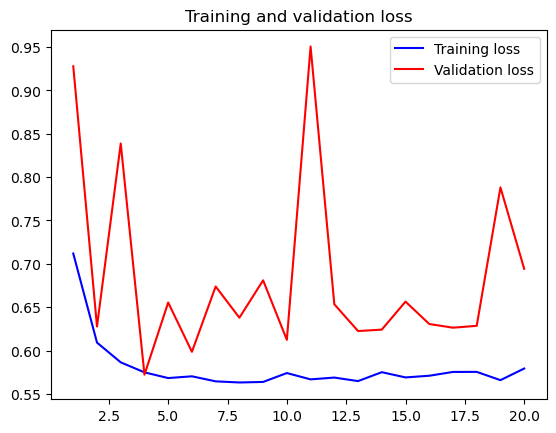

In [31]:
import matplotlib.pyplot as plt

acc = gl_result.history['accuracy']
val_acc = gl_result.history['val_accuracy']
loss = gl_result.history['loss']
val_loss = gl_result.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
loss, acc = model_gl.evaluate(x_test, y_test)
print('Test accuracy:', acc)
print('Test loss:', loss)

469/469 [==============================] - 0s 358us/step - loss: 0.6945 - accuracy: 0.7085
Test accuracy: 0.7085333466529846
Test loss: 0.6945299506187439
